In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
cancer = load_breast_cancer()

In [3]:
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

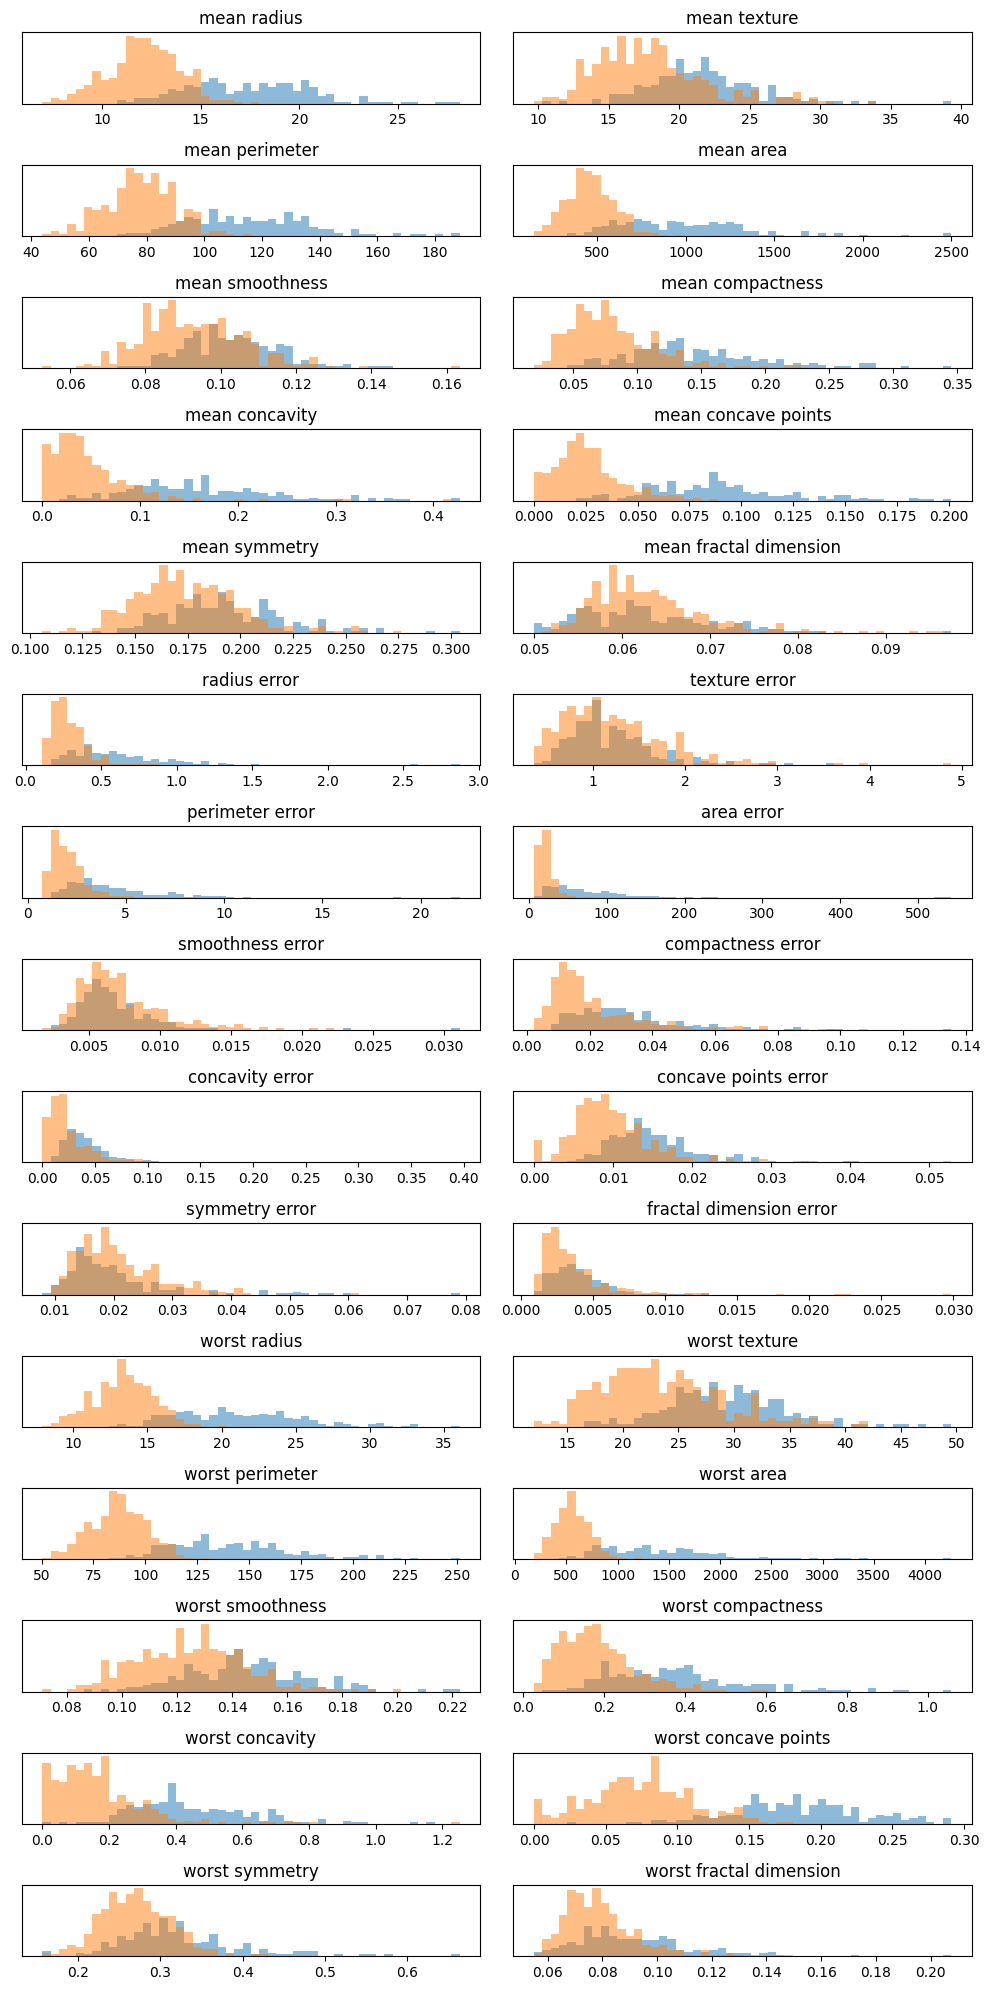

In [ ]:
# 두개의 그림이 멀수록 분류하기 좋고 더 확실한 데이터라고 인식한다.
# 모델의 복잡도를 낮추기 위해서 픽쳐들을 줄여야 하는데 그 방법중에 하나가 PCA이다.
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)

    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5)

    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

fig.tight_layout()


In [5]:
x_scaled = StandardScaler().fit_transform(cancer.data)

In [6]:
x_pca = PCA(n_components=2).fit_transform(x_scaled)

<Axes: >

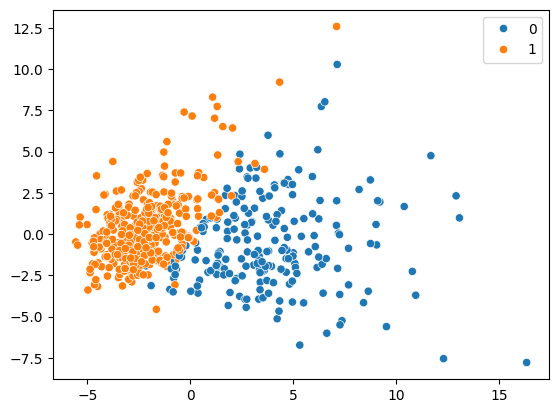

In [7]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=cancer.target)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, cancer.target, test_size=0.3, random_state=1)

In [ ]:

model = RandomForestClassifier(random_state=1)

In [10]:
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
model.score(x_test,y_test)

0.935672514619883

In [12]:
predict = model.predict(x_test)

In [14]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        63
           1       0.95      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
# 주성분 분석을 하는 이유가 차원의 저주 때문이기도 하다. (액스가 많아지면 분석하기 힘들기 때문이다.)